<a href="https://colab.research.google.com/github/aslyldrm/Predicting-Heart-Disease-Classification/blob/main/Predicting_Heart_Disease_Using_the_BRFSS_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Data Exploration & Preprocessing

## Understanding the Dataset

In [ ]:
dataset = pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')
dataset.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
X = dataset.iloc[:, 1:]
y = dataset.iloc[:, 0] # target variable -> HeartDiseaseorAttack

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
len(dataset)

253680

In [ ]:
dataset.isnull().sum()

,0
HeartDiseaseorAttack,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
Diabetes,0
PhysActivity,0
Fruits,0


In [ ]:
dataset.nunique()

,0
HeartDiseaseorAttack,2
HighBP,2
HighChol,2
CholCheck,2
BMI,84
Smoker,2
Stroke,2
Diabetes,3
PhysActivity,2
Fruits,2


## Exploratory Data Analysis (EDA)

In [ ]:
# Statistics for Numerical Variables
dataset[["BMI",'MentHlth','PhysHlth']].describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
MentHlth,253680.0,3.184772,7.412847,0.0,0.0,0.0,2.0,30.0
PhysHlth,253680.0,4.242081,8.717951,0.0,0.0,0.0,3.0,30.0


In [ ]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
HeartDiseaseorAttack,253680.0,9.418559e-02,0.292087,0.000000,0.000000,0.000000,0.000000,1.000000
HighBP,253680.0,4.290011e-01,0.494934,0.000000,0.000000,0.000000,1.000000,1.000000
HighChol,253680.0,4.241209e-01,0.494210,0.000000,0.000000,0.000000,1.000000,1.000000
CholCheck,253680.0,9.626695e-01,0.189571,0.000000,1.000000,1.000000,1.000000,1.000000
BMI,253680.0,2.838236e+01,6.608694,12.000000,24.000000,27.000000,31.000000,98.000000
Smoker,253680.0,4.431686e-01,0.496761,0.000000,0.000000,0.000000,1.000000,1.000000
Stroke,253680.0,4.057080e-02,0.197294,0.000000,0.000000,0.000000,0.000000,1.000000
Diabetes,253680.0,2.969213e-01,0.698160,0.000000,0.000000,0.000000,0.000000,2.000000
PhysActivity,253680.0,7.565437e-01,0.429169,0.000000,1.000000,1.000000,1.000000,1.000000
Fruits,253680.0,6.342558e-01,0.481639,0.000000,0.000000,1.000000,1.000000,1.000000


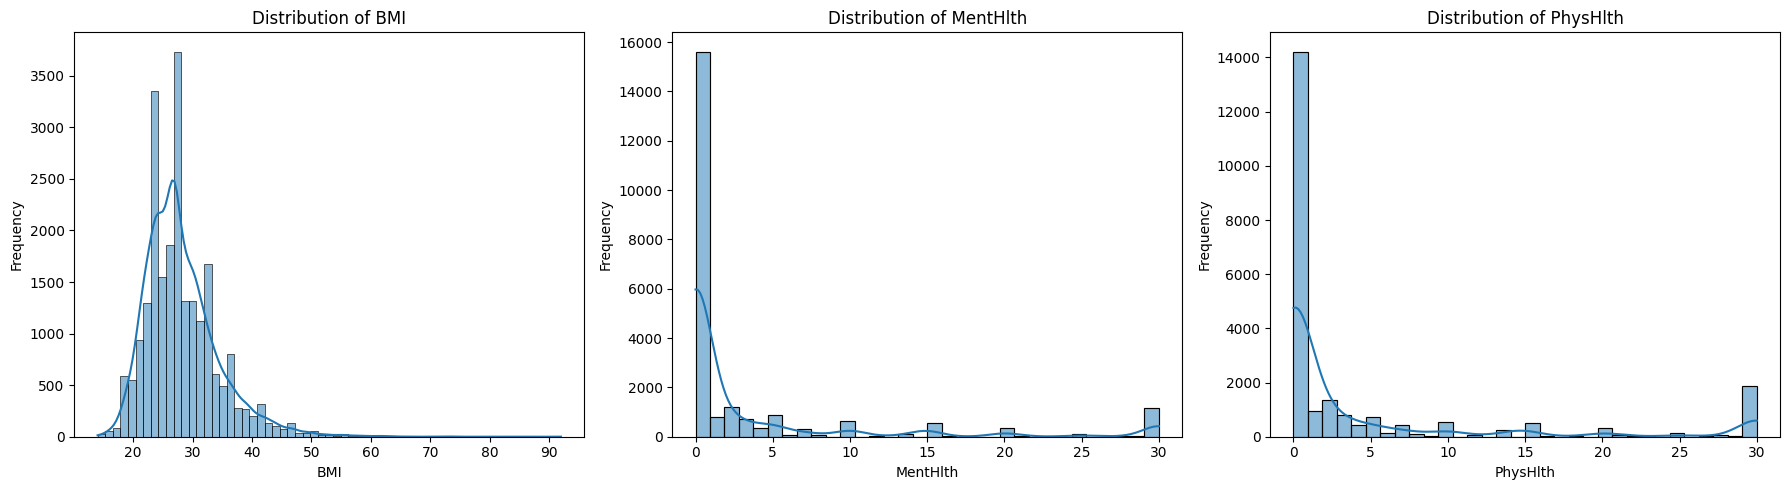

In [ ]:
# Visualization of numerical datas (histograms)

plt.figure(figsize=(18, 5))

colms = ["BMI", "MentHlth", "PhysHlth"]

for i, col in enumerate(colms, 1):
    plt.subplot(1, 3, i)
    max_val = len(dataset[col].unique())
    sns.histplot(dataset[col], bins=max_val, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

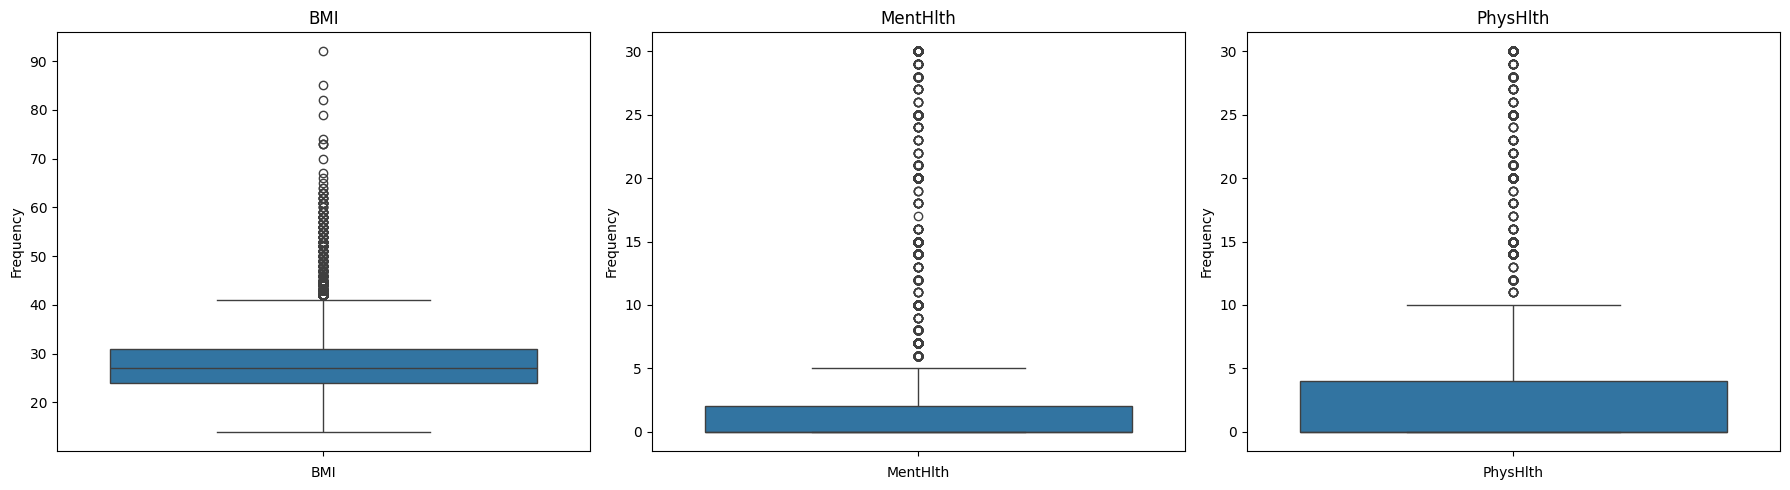

In [ ]:
# Visualization of numerical datas (boxplots)
plt.figure(figsize=(18, 5))
for i, col in enumerate(colms, 1):
  plt.subplot(1, 3, i)
  sns.boxplot(y=dataset[col])
  plt.title(col)
  plt.xlabel(col)
  plt.ylabel("Frequency")
plt.tight_layout()
plt.show()
# Although the columns contains outliers, these outliers could have an important effect on the model

In [ ]:
# Statistics for Categorical Variables
dataset.loc[:, ~dataset.columns.isin(["BMI",'MentHlth','PhysHlth'])].describe().T

,count,mean,std,min,25%,50%,75%,max
HeartDiseaseorAttack,23133.0,0.092206,0.289323,0.0,0.0,0.0,0.0,1.0
HighBP,23133.0,0.426188,0.494532,0.0,0.0,0.0,1.0,1.0
HighChol,23133.0,0.420482,0.493647,0.0,0.0,0.0,1.0,1.0
CholCheck,23133.0,0.961916,0.191404,0.0,1.0,1.0,1.0,1.0
Smoker,23133.0,0.431721,0.495327,0.0,0.0,0.0,1.0,1.0
Stroke,23133.0,0.042882,0.202596,0.0,0.0,0.0,0.0,1.0
Diabetes,23133.0,0.310422,0.709056,0.0,0.0,0.0,0.0,2.0
PhysActivity,23133.0,0.766870,0.422834,0.0,1.0,1.0,1.0,1.0
Fruits,23132.0,0.626664,0.483701,0.0,0.0,1.0,1.0,1.0
Veggies,23132.0,0.816920,0.386740,0.0,1.0,1.0,1.0,1.0


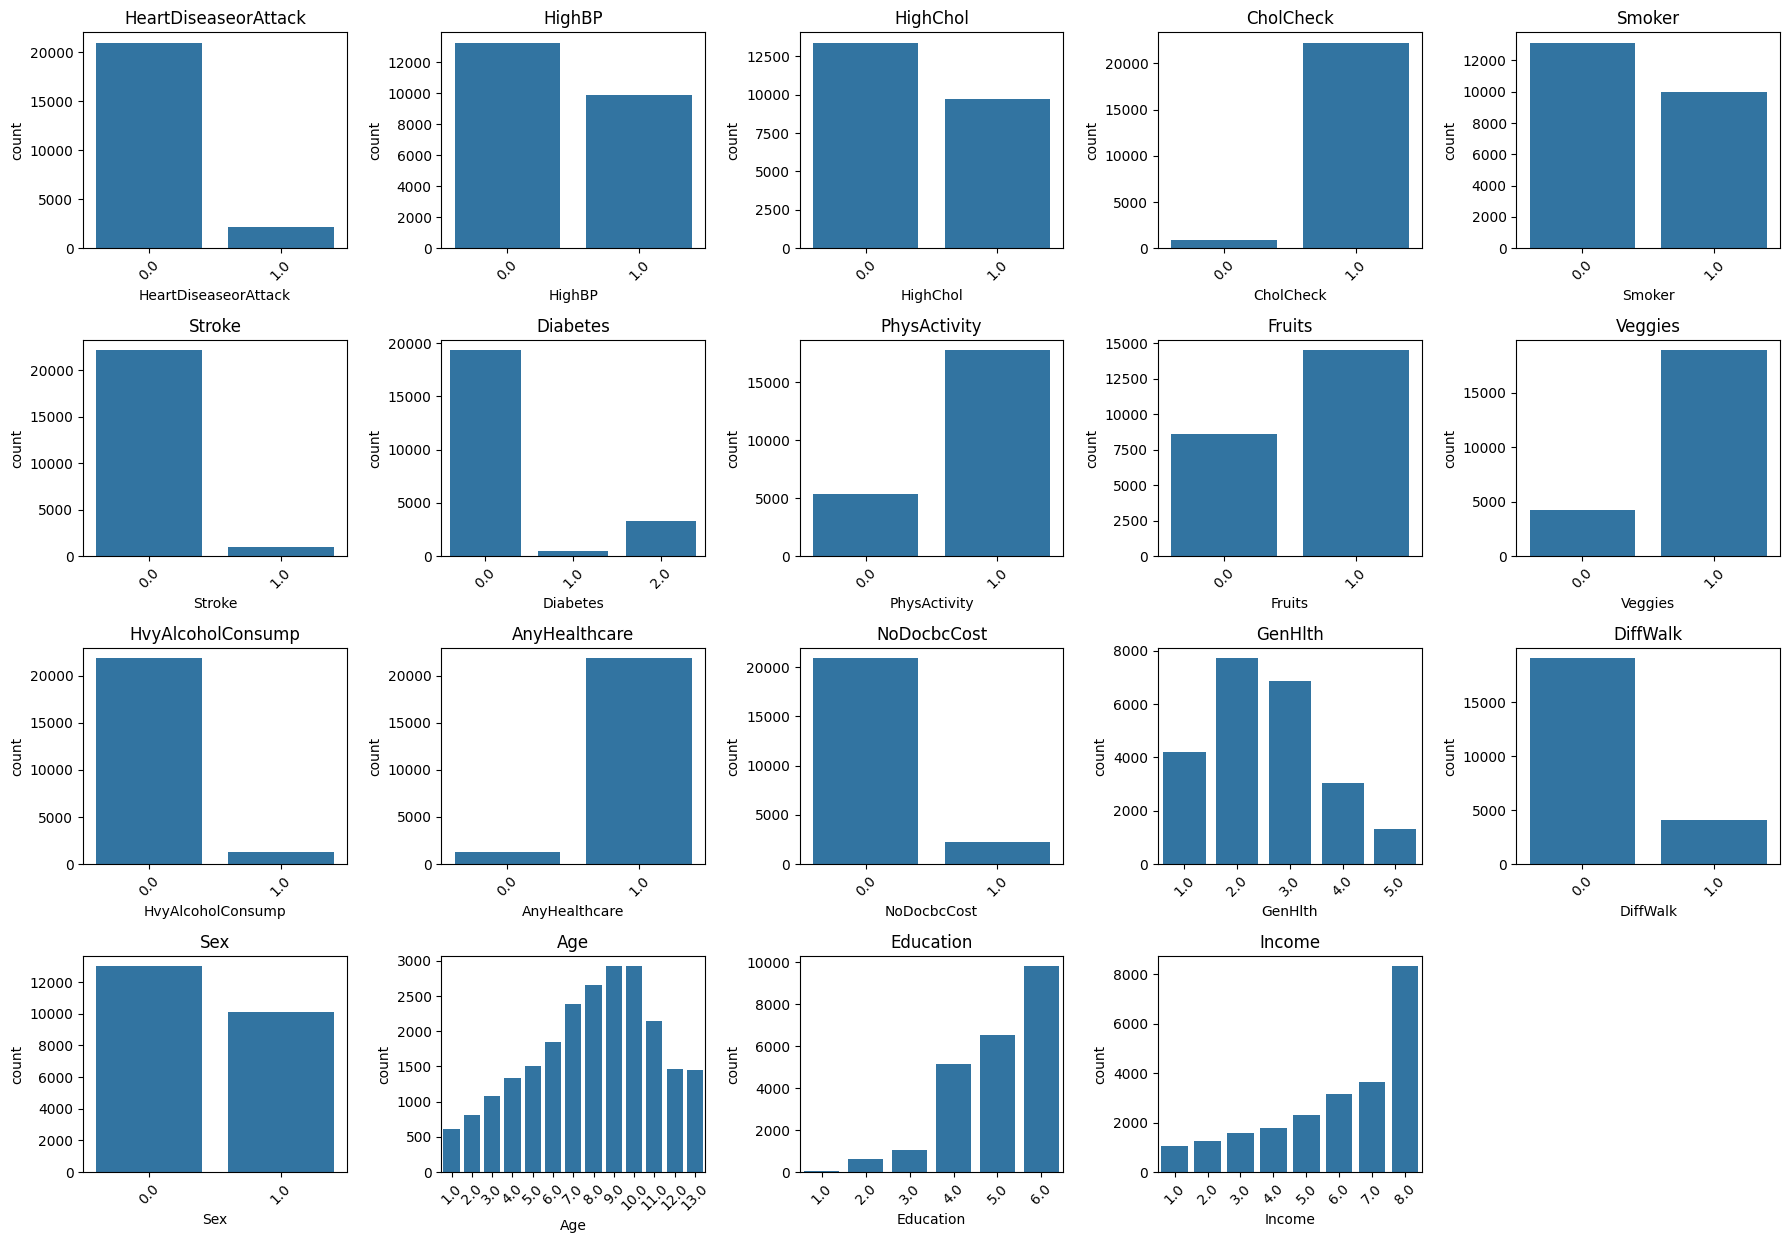

In [ ]:
# Visualization of categorical datas (bar charts)
categorical_columns = dataset.loc[:, ~dataset.columns.isin(["BMI",'MentHlth','PhysHlth'])].columns

plt.figure(figsize=(18, 15))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(5, 5, i)
    sns.countplot(x=col, data=dataset)
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

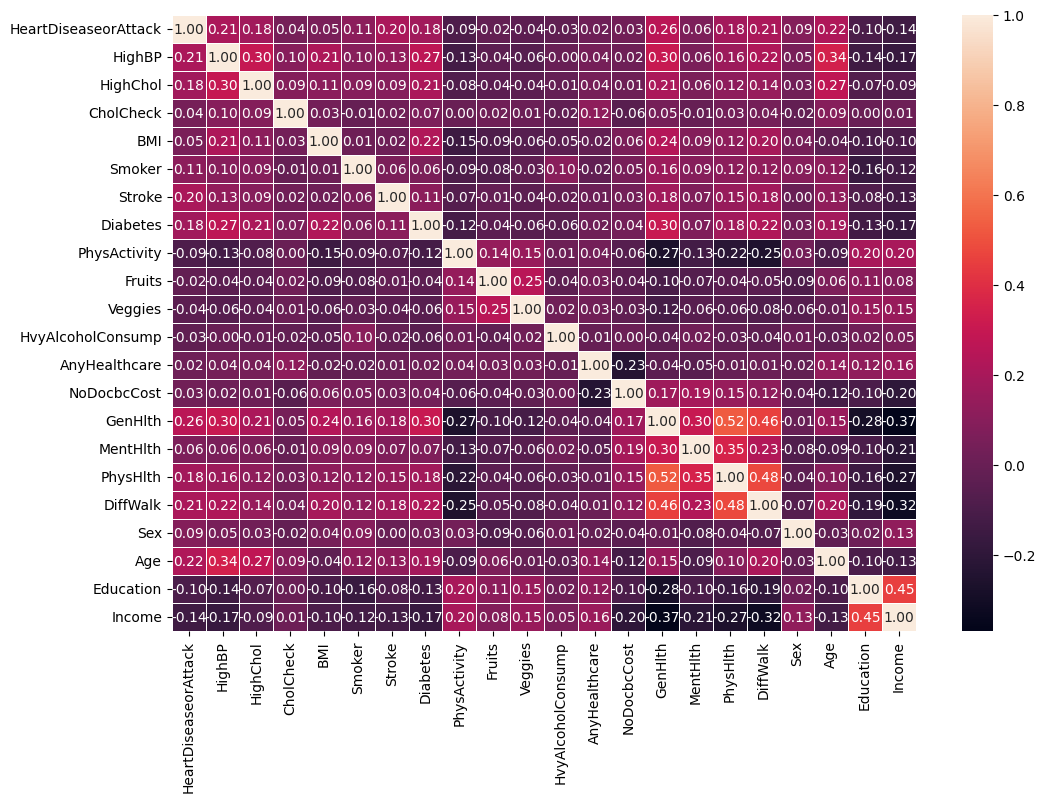

In [ ]:
# Creating correlation heatmaps to examine relationships between features
corr_matrix = dataset.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=0.5)

plt.show()

In [ ]:
corr_matrix = dataset.corr(method='spearman')
print(corr_matrix['HeartDiseaseorAttack'].sort_values(ascending=False))

HeartDiseaseorAttack    1.000000
GenHlth                 0.242243
Age                     0.227639
DiffWalk                0.212709
HighBP                  0.209361
Stroke                  0.203002
HighChol                0.180765
Diabetes                0.178564
PhysHlth                0.156630
Smoker                  0.114441
Sex                     0.086096
Z_Skoru                 0.063659
BMI                     0.063659
CholCheck               0.044206
MentHlth                0.034763
NoDocbcCost             0.031000
AnyHealthcare           0.018734
Fruits                 -0.019790
HvyAlcoholConsump      -0.028991
Veggies                -0.039167
PhysActivity           -0.087299
Education              -0.095910
Income                 -0.141485
Name: HeartDiseaseorAttack, dtype: float64


 Assessing and describing the extent of class imbalance in the target variable.
 -  For example; If we look at the HeartDiseaseorAttack columns's ratio is 90.581441 which means the model is not very significant learn to predict the minority class because of the imbalance. It is not extreme if we look at the this resource.(resource : (https://developers.google.com/machine-learning/crash-course/overfitting/imbalanced-datasets)) It is moderate amount but because we are trying to the find cases related to minority column. It effects

In [ ]:
heartDiseaseorAttack_ratio = dataset["HeartDiseaseorAttack"].value_counts(normalize=True) * 100
print(heartDiseaseorAttack_ratio)
y.value_counts()

HeartDiseaseorAttack
0.0    90.581441
1.0     9.418559
Name: proportion, dtype: float64


,count
HeartDiseaseorAttack,
0.0,229787
1.0,23893


# Model Development & Evaluation

## Addressing Class Imbalance

The model has the power to predict people who don't have the disease but the people who have the model don't have that much power. This could yield wrong predictions because our goal normally would be finding the minority class so wrong predictions about the minority would be more costly so to address class imbalance, both SMOTE (oversampling the minority class) and Random UnderSampling (reducing the majority class) were applied. SMOTE preserves data by generating synthetic samples but may add noise, while undersampling speeds up training but risks losing useful data.
I tried two feature for that SMOTE and undersampling

### SMOTE

In [ ]:
#SMOTE
from imblearn.over_sampling import SMOTE

smote=SMOTE(sampling_strategy='minority')
X_smote,y_smote=smote.fit_resample(X,y)
y_smote.value_counts()


,count
HeartDiseaseorAttack,
0.0,229787
1.0,229787


In [ ]:
from sklearn.model_selection import train_test_split
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size = 0.2)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler


numerical_cols = ["BMI",'MentHlth','PhysHlth']


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols)
    ],
    remainder='passthrough'
)


X_train_smote_scaled = preprocessor.fit_transform(X_train_smote)
X_test_smote_scaled = preprocessor.transform(X_test_smote)

### Undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)
y_resampled.value_counts()

,count
HeartDiseaseorAttack,
0.0,23893
1.0,23893


In [ ]:
from sklearn.model_selection import train_test_split
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size = 0.2)

In [ ]:
X_train_resampled = preprocessor.fit_transform(X_train_resampled)
X_test_resampled = preprocessor.transform(X_test_resampled)

## Building Classification Models For SMOTE
In here, I had problems with two models which SVC and ANN. For SVC the model was very complex for the data and for ANN I tried KerasClassifier but because of the conflicts in colab I had to use keras library.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [ ]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
log_reg=LogisticRegression(solver='liblinear')
logreg_cv=GridSearchCV(log_reg,grid,cv=10)
logreg_cv.fit(X_train_smote,y_train_smote)

best_logistic = logreg_cv.best_estimator_
print(f"tuned hpyerparameters : {logreg_cv.best_params_}")

y_pred_logistic = best_logistic.predict(X_test_smote)
test_accuracy = accuracy_score(y_test_smote, y_pred_logistic)
print(f"Test accuracy: {test_accuracy:.4f}")



tuned hpyerparameters : {'C': np.float64(0.01), 'penalty': 'l1'}
Test accuracy: 0.7822


In [ ]:
# Random Forest Classification
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()

param_dist = {
    'n_estimators': [50, 100, 150, 200, 250, 300],
    'max_depth': [4, 5, 6, 7, 8],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3]
}

rfc_random = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist,
                                n_iter=10, cv=5, n_jobs=-1)
rfc_random.fit(X_train_smote, y_train_smote)

best_rf = rfc_random.best_estimator_
print(f"Best Parameters: {rfc_random.best_params_}")

y_pred_rf = best_rf.predict(X_test_smote)
test_accuracy_rf = accuracy_score(y_test_smote, y_pred_rf)
print(f"Test accuracy: {test_accuracy_rf:.4f}")



Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 8}
Test accuracy: 0.8888


In [ ]:
importances = best_rf.feature_importances_
print(pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values('Importance', ascending=False))
# The importance came like that but the order or correlation in heatmap is different because of that I decided to left like this.

              Feature  Importance
0              HighBP    0.218006
1            HighChol    0.173662
13            GenHlth    0.152660
18                Age    0.102985
17                Sex    0.082065
16           DiffWalk    0.072497
4              Smoker    0.069294
5              Stroke    0.046918
7        PhysActivity    0.015730
8              Fruits    0.011142
15           PhysHlth    0.010661
6            Diabetes    0.009715
9             Veggies    0.009609
19          Education    0.007786
20             Income    0.007097
10  HvyAlcoholConsump    0.003997
12        NoDocbcCost    0.002315
11      AnyHealthcare    0.001493
14           MentHlth    0.001015
3                 BMI    0.000972
2           CholCheck    0.000380


I tried to exclude Cholcheck column for this model the accuracy and other things are not effected. The results came with same values and because variance results were different. I left like this.

In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.9 MB/s eta 0:00:00


I had to use Keras because of the library issues related to the colab

In [ ]:
# ANN
import keras_tuner as kt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.layers import Dropout

def build_ann_model(hp):

    model = Sequential()
    model.add(Dense(units=hp.Int('units1', min_value=32, max_value=512, step=32),
                    activation=hp.Choice('act1', values=['relu', 'tanh']),
                    input_shape=(X_train_smote.shape[1],)))
    model.add(Dropout(rate=hp.Float('dropout1', min_value=0.2, max_value=0.5, step=0.1)))

    model.add(Dense(units=hp.Int('units2', min_value=32, max_value=256, step=32),
                    activation=hp.Choice('act2', values=['relu', 'tanh'])))
    model.add(Dropout(rate=hp.Float('dropout2', min_value=0.2, max_value=0.5, step=0.1)))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model


tuner = kt.RandomSearch(
    build_ann_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='tuner_dir',
    project_name='binary_classification_tuning'
)


early_stop = EarlyStopping(monitor='val_loss', patience=5)


tuner.search(X_train_smote, y_train_smote,
             epochs=20,
             batch_size=64,
             validation_split=0.2,
             callbacks=[early_stop])


best_model_ann = tuner.get_best_models(num_models=1)[0]

test_loss_ann, test_acc_ann = best_model_ann.evaluate(X_test_smote, y_test_smote)
print(f"Best Test Accuracy: {test_acc_ann:.4f}, Loss: {test_loss_ann:.4f}")


Trial 5 Complete [00h 04m 54s]
val_accuracy: 0.8602785468101501

Best val_accuracy So Far: 0.8750067949295044
Total elapsed time: 00h 22m 22s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 8 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


2873/2873 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8721 - loss: 0.2935
Best Test Accuracy: 0.8724, Loss: 0.2934


In [ ]:
# XGBoost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report


xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)


param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}


grid_search_xgb = GridSearchCV(estimator=xgb_model,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=3,
                           verbose=1,
                           n_jobs=-1)


grid_search_xgb.fit(X_train_smote, y_train_smote)


print("Best Parameters:", grid_search_xgb.best_params_)
print(f"Best Cross-Val Accuracy: {grid_search_xgb.best_score_:.4f}")

best_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test_smote)


accuracy_xgb = accuracy_score(y_test_smote, y_pred_xgb)
print(f"Test Accuracy: {accuracy_xgb:.4f}")
print("\nClassification Report:\n", classification_report(y_test_smote, y_pred_xgb))


Fitting 3 folds for each of 72 candidates, totalling 216 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:40:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
Best Cross-Val Accuracy: 0.9452
Test Accuracy: 0.9444

Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     46000
         1.0       0.99      0.90      0.94     45915

    accuracy                           0.94     91915
   macro avg       0.95      0.94      0.94     91915
weighted avg       0.95      0.94      0.94     91915



## Model Evaluation For SMOTE


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

In [ ]:
#Logistic Regression

precision_logistic = precision_score(y_test_smote, y_pred_logistic)
recall_logistic = recall_score(y_test_smote, y_pred_logistic)
f1_logistic = f1_score(y_test_smote, y_pred_logistic)

auc_logistic = roc_auc_score(y_test_smote, best_logistic.predict_proba(X_test_smote)[:, 1])

print(f'Accuracy: {test_accuracy:.4f}')
print(f'Precision: {precision_logistic:.4f}')
print(f'Recall: {recall_logistic:.4f}')
print(f'F1-Score: {f1_logistic:.4f}')
print(f'AUC-ROC: {auc_logistic:.4f}')
print("\nClassification Report:\n", classification_report(y_test_smote, y_pred_logistic))


Accuracy: 0.7822
Precision: 0.7659
Recall: 0.8122
F1-Score: 0.7884
AUC-ROC: 0.8553

Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.75      0.78     46000
         1.0       0.77      0.81      0.79     45915

    accuracy                           0.78     91915
   macro avg       0.78      0.78      0.78     91915
weighted avg       0.78      0.78      0.78     91915



In [ ]:
# Random Forest

precision_rf = precision_score(y_test_smote, y_pred_rf)
recall_rf = recall_score(y_test_smote, y_pred_rf)
f1_rf = f1_score(y_test_smote, y_pred_rf)
auc_rf = roc_auc_score(y_test_smote, best_rf.predict_proba(X_test_smote)[:, 1])

print(f'Accuracy: {test_accuracy_rf:.4f}')
print(f'Precision: {precision_rf:.4f}')
print(f'Recall: {recall_rf:.4f}')
print(f'F1-Score: {f1_rf:.4f}')
print(f'AUC-ROC: {auc_rf:.4f}')
print("\nClassification Report:\n", classification_report(y_test_smote, y_pred_rf))


Accuracy: 0.8888
Precision: 0.8770
Recall: 0.9042
F1-Score: 0.8904
AUC-ROC: 0.9607

Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.87      0.89     46000
         1.0       0.88      0.90      0.89     45915

    accuracy                           0.89     91915
   macro avg       0.89      0.89      0.89     91915
weighted avg       0.89      0.89      0.89     91915



In [ ]:
# ANN
y_pred_ann = (best_model_ann.predict(X_test_smote) > 0.5).astype("int32")

precision_ann = precision_score(y_test_smote, y_pred_ann)
recall_ann = recall_score(y_test_smote, y_pred_ann)
f1_ann = f1_score(y_test_smote, y_pred_ann)


auc_ann = roc_auc_score(y_test_smote, best_model_ann.predict(X_test_smote))

print(f'Accuracy: {test_acc_ann:.4f}')
print(f'Precision: {precision_ann:.4f}')
print(f'Recall: {recall_ann:.4f}')
print(f'F1-Score: {f1_ann:.4f}')
print(f'AUC-ROC: {auc_ann:.4f}')
print("\nClassification Report:\n", classification_report(y_test_smote, y_pred_ann))

2873/2873 ━━━━━━━━━━━━━━━━━━━━ 3s 873us/step
2873/2873 ━━━━━━━━━━━━━━━━━━━━ 3s 875us/step
Accuracy: 0.8724
Precision: 0.8842
Recall: 0.8568
F1-Score: 0.8702
AUC-ROC: 0.9491

Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.89      0.87     46000
         1.0       0.88      0.86      0.87     45915

    accuracy                           0.87     91915
   macro avg       0.87      0.87      0.87     91915
weighted avg       0.87      0.87      0.87     91915



In [ ]:
# XGBoost
precision_xgb = precision_score(y_test_smote, y_pred_xgb)
recall_xgb = recall_score(y_test_smote, y_pred_xgb)
f1_xgb = f1_score(y_test_smote, y_pred_xgb)
auc_xgb = roc_auc_score(y_test_smote, best_xgb.predict_proba(X_test_smote)[:, 1])

print(f'Accuracy: {accuracy_xgb:.4f}')
print(f'Precision: {precision_xgb:.4f}')
print(f'Recall: {recall_xgb:.4f}')
print(f'F1-Score: {f1_xgb:.4f}')
print(f'AUC-ROC: {auc_xgb:.4f}')
print("\nClassification Report:\n", classification_report(y_test_smote, y_pred_xgb))

Accuracy: 0.9444
Precision: 0.9863
Recall: 0.9011
F1-Score: 0.9418
AUC-ROC: 0.9828

Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     46000
         1.0       0.99      0.90      0.94     45915

    accuracy                           0.94     91915
   macro avg       0.95      0.94      0.94     91915
weighted avg       0.95      0.94      0.94     91915



## Building Classification Models For Under-Sampling


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [ ]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression



grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
log_reg_resampled=LogisticRegression(solver='liblinear')
logreg_cv_resampled=GridSearchCV(log_reg,grid,cv=10)
logreg_cv_resampled.fit(X_train_resampled,y_train_resampled)

best_logistic_resampled = logreg_cv_resampled.best_estimator_
print(f"tuned hpyerparameters :(best parameters) {logreg_cv_resampled.best_params_}")

y_pred_logistic_resampled = best_logistic_resampled.predict(X_test_resampled)
test_accuracy_resampled = accuracy_score(y_test_resampled, y_pred_logistic_resampled)
print(f"Test accuracy: {test_accuracy_resampled:.4f}")



tuned hpyerparameters :(best parameters) {'C': np.float64(0.1), 'penalty': 'l1'}
Test accuracy: 0.7641


In [ ]:
# Random Forest Classification
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

rf_model_resampled = RandomForestClassifier()

param_dist = {
    'n_estimators': [50, 100, 150, 200, 250, 300],
    'max_depth': [4, 5, 6, 7, 8],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3]
}

rfc_random = RandomizedSearchCV(estimator=rf_model_resampled, param_distributions=param_dist,
                                n_iter=10, cv=5, n_jobs=-1)
rfc_random.fit(X_train_resampled, y_train_resampled)

best_rf = rfc_random.best_estimator_
print(f"Best Parameters: {rfc_random.best_params_}")

y_pred_rf = best_rf.predict(X_test_resampled)
test_accuracy_rf = accuracy_score(y_test_resampled, y_pred_rf)
print(f"Test accuracy: {test_accuracy_rf:.4f}")



Best Parameters: {'n_estimators': 250, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_depth': 8}
Test accuracy: 0.7635


In [ ]:
# ANN
import keras_tuner as kt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.layers import Dropout

def build_ann_model(hp):

    model = Sequential()
    model.add(Dense(units=hp.Int('units1', min_value=32, max_value=512, step=32),
                    activation=hp.Choice('act1', values=['relu', 'tanh']),
                    input_shape=(X_train_resampled.shape[1],)))
    model.add(Dropout(rate=hp.Float('dropout1', min_value=0.2, max_value=0.5, step=0.1)))

    model.add(Dense(units=hp.Int('units2', min_value=32, max_value=256, step=32),
                    activation=hp.Choice('act2', values=['relu', 'tanh'])))
    model.add(Dropout(rate=hp.Float('dropout2', min_value=0.2, max_value=0.5, step=0.1)))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model


tuner = kt.RandomSearch(
    build_ann_model,
    objective='val_accuracy',
    max_trials=3,
    executions_per_trial=1,
    directory='tuner_dir_resampled',
    project_name='binary_classification_tuning_resampled'
)


early_stop = EarlyStopping(monitor='val_loss', patience=5)


tuner.search(X_train_resampled, y_train_resampled,
             epochs=20,
             batch_size=64,
             validation_split=0.2,
             callbacks=[early_stop])


best_model_ann = tuner.get_best_models(num_models=1)[0]

test_loss_ann, test_acc_ann = best_model_ann.evaluate(X_test_resampled, y_test_resampled)
print(f"Best Test Accuracy: {test_acc_ann:.4f}, Loss: {test_loss_ann:.4f}")


Trial 3 Complete [00h 00m 27s]
val_accuracy: 0.77203768491745

Best val_accuracy So Far: 0.7793617844581604
Total elapsed time: 00h 02m 11s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 8 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7631 - loss: 0.4875
Best Test Accuracy: 0.7662, Loss: 0.4897


In [ ]:
# XGBoost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report


xgb_model_resampled = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)


param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}


grid_search_xgb = GridSearchCV(estimator=xgb_model_resampled,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=3,
                           verbose=1,
                           n_jobs=-1)


grid_search_xgb.fit(X_train_resampled, y_train_resampled)


print("Best Parameters:", grid_search_xgb.best_params_)
print(f"Best Cross-Val Accuracy: {grid_search_xgb.best_score_:.4f}")

best_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test_resampled)


accuracy_xgb = accuracy_score(y_test_resampled, y_pred_xgb)
print(f"Test Accuracy (XGBoost - Tuned): {accuracy_xgb:.4f}")
print("\nClassification Report:\n", classification_report(y_test_resampled, y_pred_xgb))


Fitting 3 folds for each of 72 candidates, totalling 216 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:47:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'subsample': 1.0}
Best Cross-Val Accuracy: 0.7768
Test Accuracy (XGBoost - Tuned): 0.7672

Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      0.72      0.75      4722
         1.0       0.75      0.81      0.78      4836

    accuracy                           0.77      9558
   macro avg       0.77      0.77      0.77      9558
weighted avg       0.77      0.77      0.77      9558



## Model Evaluation For Under-Sampling


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

In [ ]:
#Logistic Regression

precision_logistic = precision_score(y_test_resampled, y_pred_logistic_resampled)
recall_logistic = recall_score(y_test_resampled, y_pred_logistic_resampled)
f1_logistic = f1_score(y_test_resampled, y_pred_logistic_resampled)

auc_logistic = roc_auc_score(y_test_resampled, best_logistic.predict_proba(X_test_resampled)[:, 1])

print(f'Accuracy: {test_accuracy:.4f}')
print(f'Precision: {precision_logistic:.4f}')
print(f'Recall: {recall_logistic:.4f}')
print(f'F1-Score: {f1_logistic:.4f}')
print(f'AUC-ROC: {auc_logistic:.4f}')
print("\nClassification Report:\n", classification_report(y_test_resampled, y_pred_logistic_resampled))


Accuracy: 0.7822
Precision: 0.7568
Recall: 0.7864
F1-Score: 0.7713
AUC-ROC: 0.7731

Classification Report:
               precision    recall  f1-score   support

         0.0       0.77      0.74      0.76      4722
         1.0       0.76      0.79      0.77      4836

    accuracy                           0.76      9558
   macro avg       0.76      0.76      0.76      9558
weighted avg       0.76      0.76      0.76      9558



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Random Forest

precision_rf = precision_score(y_test_resampled, y_pred_rf)
recall_rf = recall_score(y_test_resampled, y_pred_rf)
f1_rf = f1_score(y_test_resampled, y_pred_rf)
auc_rf = roc_auc_score(y_test_resampled, best_rf.predict_proba(X_test_resampled)[:, 1])

print(f'Accuracy: {test_accuracy_rf:.4f}')
print(f'Precision: {precision_rf:.4f}')
print(f'Recall: {recall_rf:.4f}')
print(f'F1-Score: {f1_rf:.4f}')
print(f'AUC-ROC: {auc_rf:.4f}')
print("\nClassification Report:\n", classification_report(y_test_resampled, y_pred_rf))


Accuracy: 0.7635
Precision: 0.7423
Recall: 0.8160
F1-Score: 0.7774
AUC-ROC: 0.8386

Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      0.71      0.75      4722
         1.0       0.74      0.82      0.78      4836

    accuracy                           0.76      9558
   macro avg       0.77      0.76      0.76      9558
weighted avg       0.77      0.76      0.76      9558



In [ ]:
# ANN
y_pred_ann = (best_model_ann.predict(X_test_resampled) > 0.5).astype("int32")

precision_ann = precision_score(y_test_resampled, y_pred_ann)
recall_ann = recall_score(y_test_resampled, y_pred_ann)
f1_ann = f1_score(y_test_resampled, y_pred_ann)

auc_ann = roc_auc_score(y_test_resampled, best_model_ann.predict(X_test_resampled))

print(f'Accuracy: {test_acc_ann:.4f}')
print(f'Precision: {precision_ann:.4f}')
print(f'Recall: {recall_ann:.4f}')
print(f'F1-Score: {f1_ann:.4f}')
print(f'AUC-ROC: {auc_ann:.4f}')
print("\nClassification Report:\n", classification_report(y_test_resampled, y_pred_ann))

299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step
Accuracy: 0.7662
Precision: 0.7392
Recall: 0.8311
F1-Score: 0.7824
AUC-ROC: 0.8402

Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.70      0.75      4722
         1.0       0.74      0.83      0.78      4836

    accuracy                           0.77      9558
   macro avg       0.77      0.77      0.76      9558
weighted avg       0.77      0.77      0.77      9558



In [ ]:
# XGBoost
precision_xgb = precision_score(y_test_resampled, y_pred_xgb)
recall_xgb = recall_score(y_test_resampled, y_pred_xgb)
f1_xgb = f1_score(y_test_resampled, y_pred_xgb)
auc_xgb = roc_auc_score(y_test_resampled, best_xgb.predict_proba(X_test_resampled)[:, 1])

print(f'Accuracy: {accuracy_xgb:.4f}')
print(f'Precision: {precision_xgb:.4f}')
print(f'Recall: {recall_xgb:.4f}')
print(f'F1-Score: {f1_xgb:.4f}')
print(f'AUC-ROC: {auc_xgb:.4f}')
print("\nClassification Report:\n", classification_report(y_test_resampled, y_pred_xgb))

Accuracy: 0.7672
Precision: 0.7489
Recall: 0.8122
F1-Score: 0.7793
AUC-ROC: 0.8421

Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      0.72      0.75      4722
         1.0       0.75      0.81      0.78      4836

    accuracy                           0.77      9558
   macro avg       0.77      0.77      0.77      9558
weighted avg       0.77      0.77      0.77      9558

